In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Sample data structure (you'll replace with your actual measurements)
metrics = {
    'Platform': ['GPU', 'Arduino Nano BLE 33'],
    'Inference Time (ms)': [15, 250],  # Example values
    'Memory Usage (MB)': [120, 0.136],  # Example values
    'Power Consumption (W)': [150, 0.015],  # Example values
    'Accuracy (%)': [92, 85]  # Example values
}

df = pd.DataFrame(metrics)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12556\1493197457.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platform', y='Inference Time (ms)', data=df, palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12556\1493197457.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  memory_plot = sns.barplot(x='Platform', y='Memory Usage (MB)', data=df, palette='viridis')


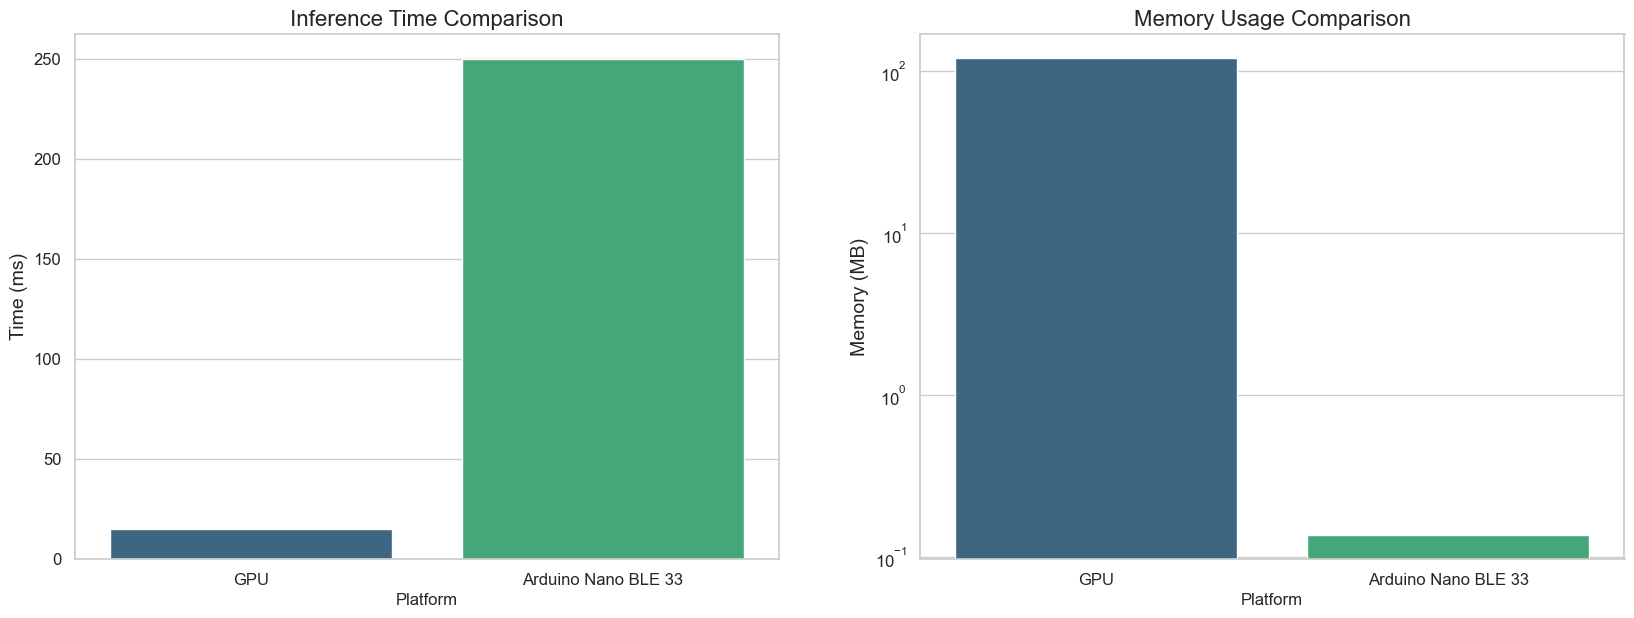

In [ ]:
# Set style for plots
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

# 1. Inference Time Comparison
plt.subplot(2, 2, 1)
sns.barplot(x='Platform', y='Inference Time (ms)', data=df, palette='viridis')
plt.title('Inference Time Comparison', fontsize=16)
plt.ylabel('Time (ms)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 2. Memory Usage Comparison (log scale)
plt.subplot(2, 2, 2)
memory_plot = sns.barplot(x='Platform', y='Memory Usage (MB)', data=df, palette='viridis')
plt.title('Memory Usage Comparison', fontsize=16)
plt.ylabel('Memory (MB)', fontsize=14)
plt.yscale('log')  # Log scale for better comparison
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add value labels on bars
# for i, value in enumerate(df['Memory Usage (MB)']):
#     memory_plot.text(i, value/10, f'{value} MB', ha='center', fontsize=12)

# Add value labels on bars with adjusted position
for i, value in enumerate(df['Memory Usage (MB)']):
    if value < 1:  # For small values (like Arduino's 0.136)
        memory_plot.text(i, value * 1.5, f'{value} MB', 
                        ha='center', va='bottom', fontsize=12)
    else:  # For larger values
        memory_plot.text(i, value/2, f'{value} MB', 
                        ha='center', va='center', fontsize=12)

# Adjust y-axis limits to show small values better
plt.ylim(0.1, plt.ylim()[1])  # Set minimum y to 0.1 MB

plt.show()